'''
v1: Scienceon, DBPIA, NTIS AuthorPapers 접근하여 Rawdata에서 필터링된 papers를 추가
v2: Answer 변경 및 f_id 수정 중
v3: time, tqdm 추가하여 속도 확인
v4: Scienceon, DBPIA에 mng로 검색 추가
v5: DBPIA 삭제하고 KCI 추가 & Rawdata 먼저 접급으로 변경, answer check 추가
'''

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd

In [2]:
xlsData = pd.read_excel("C:/workSpace(expert)/PM10.xlsx")

In [3]:
df = xlsData[['PM10_LEVEL2', 'Temp', 'Humidity']]
df

,PM10_LEVEL2,Temp,Humidity
0,BAD,-0.8,78.0
1,BAD,-1.8,85.0
2,BAD,-2.0,88.0
3,BAD,-2.6,90.0
4,BAD,-3.0,92.0
...,...,...,...
16155,GOOD,1.0,39.0
16156,NORMAL,0.5,45.0
16157,NORMAL,0.1,51.0
16158,NORMAL,0.1,53.0


In [4]:
X = df.iloc[:, [1, 2]].values
m = X.shape[0]
n = X.shape[1]

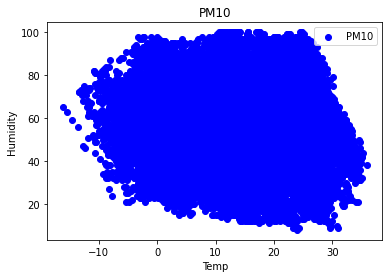

In [5]:
plt.scatter(X[:,0],X[:,1],c='blue',label='PM10')
plt.xlabel('Temp')
plt.ylabel('Humidity')
plt.legend()
plt.title('PM10')
plt.show()

In [6]:
K=4
n_iter=100

In [7]:
Centroids=np.array([]).reshape(n,0)
Centroids

array([], shape=(2, 0), dtype=float64)

In [8]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
Centroids

array([[11.5,  0. , 16.1, 14. ],
       [76. , 44. , 96. , 27. ]])

In [9]:
Output={}

In [10]:
EuclidianDistance=np.array([]).reshape(m,0)
EuclidianDistance

array([], shape=(16160, 0), dtype=float64)

In [11]:
Centroids[:,0]

array([11.5, 76. ])

In [12]:
tempDist = np.sum((X-Centroids[:,0])**2,axis=1)
tempDist

array([155.29, 257.89, 326.25, ..., 754.96, 658.96, 623.24])

In [13]:
np.c_[EuclidianDistance,tempDist]

array([[155.29],
       [257.89],
       [326.25],
       ...,
       [754.96],
       [658.96],
       [623.24]])

In [14]:
for k in range(K):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
EuclidianDistance

array([[ 155.29, 1156.64,  609.61, 2820.04],
       [ 257.89, 1684.24,  441.41, 3613.64],
       [ 326.25, 1940.  ,  391.61, 3977.  ],
       ...,
       [ 754.96,   49.01, 2281.  ,  769.21],
       [ 658.96,   81.01, 2105.  ,  869.21],
       [ 623.24,  100.09, 2032.96,  933.49]])

In [15]:
np.argmin(EuclidianDistance,axis=1)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [16]:
C=np.argmin(EuclidianDistance,axis=1)+1
C

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [17]:
Y={}

In [18]:
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
Y

{1: array([], shape=(2, 0), dtype=float64),
 2: array([], shape=(2, 0), dtype=float64),
 3: array([], shape=(2, 0), dtype=float64),
 4: array([], shape=(2, 0), dtype=float64)}

In [19]:
Y[C[0]]=np.c_[Y[C[0]],X[0]]
Y[C[0]]

array([[-0.8],
       [78. ]])

In [20]:
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
Y

{1: array([[-0.8, -0.8, -1.8, ..., -0.1,  0.6,  1.5],
        [78. , 78. , 85. , ..., 81. , 76. , 67. ]]),
 2: array([[ 4.1,  5. ,  6. , ...,  0.1,  0.1, -0.3],
        [56. , 48. , 45. , ..., 51. , 53. , 54. ]]),
 3: array([[-2.6, -3. , -3.6, ...,  1.6,  1.2,  1.2],
        [90. , 92. , 92. , ..., 93. , 93. , 95. ]]),
 4: array([[ 6.6,  6.1,  6.5, ...,  3.6,  3.4,  2.6],
        [33. , 33. , 32. , ..., 30. , 26. , 27. ]])}

In [21]:
Y[1]

array([[-0.8, -0.8, -1.8, ..., -0.1,  0.6,  1.5],
       [78. , 78. , 85. , ..., 81. , 76. , 67. ]])

In [22]:
Y[1].T

array([[-0.8, 78. ],
       [-0.8, 78. ],
       [-1.8, 85. ],
       ...,
       [-0.1, 81. ],
       [ 0.6, 76. ],
       [ 1.5, 67. ]])

In [23]:
for k in range(K): # 0, 1, 2
    Y[k+1]=Y[k+1].T
Y

{1: array([[-0.8, 78. ],
        [-0.8, 78. ],
        [-1.8, 85. ],
        ...,
        [-0.1, 81. ],
        [ 0.6, 76. ],
        [ 1.5, 67. ]]),
 2: array([[ 4.1, 56. ],
        [ 5. , 48. ],
        [ 6. , 45. ],
        ...,
        [ 0.1, 51. ],
        [ 0.1, 53. ],
        [-0.3, 54. ]]),
 3: array([[-2.6, 90. ],
        [-3. , 92. ],
        [-3.6, 92. ],
        ...,
        [ 1.6, 93. ],
        [ 1.2, 93. ],
        [ 1.2, 95. ]]),
 4: array([[ 6.6, 33. ],
        [ 6.1, 33. ],
        [ 6.5, 32. ],
        ...,
        [ 3.6, 30. ],
        [ 3.4, 26. ],
        [ 2.6, 27. ]])}

In [24]:
for k in range(K): # 0, 1, 2
     Centroids[:,k]=np.mean(Y[k+1],axis=0)
Centroids

array([[14.04797287,  4.80091241, 16.38999319, 19.61803981],
       [70.6459694 , 48.50707117, 91.38121171, 32.48853616]])

In [25]:
for i in range(n_iter):
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]
    for k in range(K):
        Y[k+1]=Y[k+1].T
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

IndexError: list index out of range

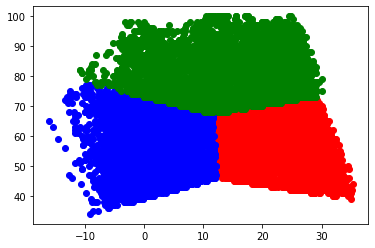

In [26]:
color=['red','blue','green', 'yellow']
labels=['cluster1','cluster2','cluster3', 'cluster4']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Temp')
plt.ylabel('Humidity')
plt.legend()
plt.show()